<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [107]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



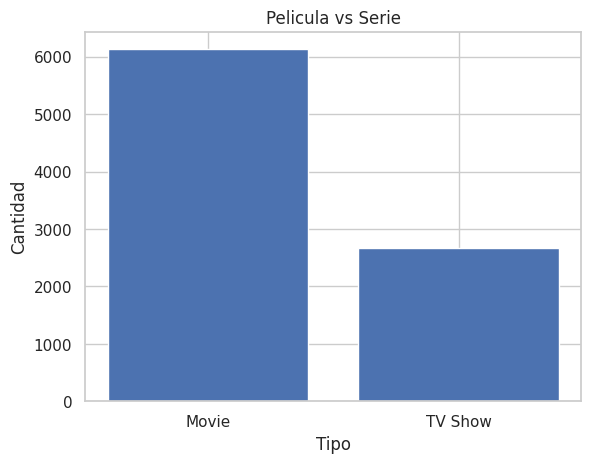

In [108]:
#1
x=df['type'].value_counts().index
y=df['type'].value_counts().values
plt.bar(x,y)

plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Pelicula vs Serie')

plt.show()

El tipo predominante son las peliculas, puede ser una buena opcion para personas que buscan este tipo de contenido ya que ofrecen una alta cantidad y diversidad.


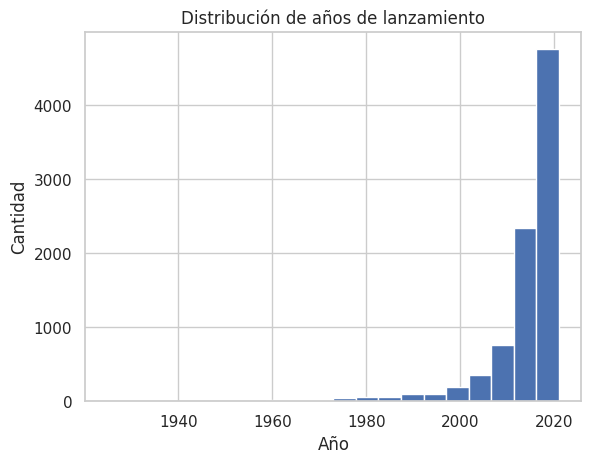

In [109]:
#2
plt.hist(df['release_year'], bins=20)

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de años de lanzamiento')
plt.show()

Hay más contenido reciente sobretodo de 2020 y poco contenido antiguo, se puede apreciar el crecimiento acelerado que ha tenido desde la decada del 2010.

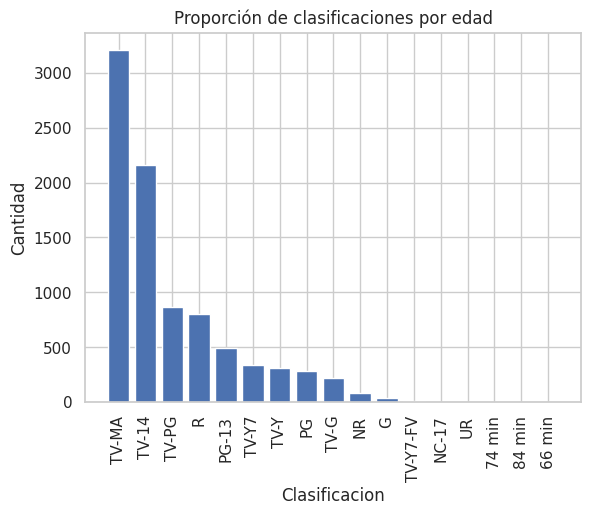

In [110]:
#3
x=df['rating'].value_counts().index
y=df['rating'].value_counts().values

plt.bar(x,y)
plt.xlabel('Clasificacion')
plt.ylabel('Cantidad')
plt.title('Proporción de clasificaciones por edad')
plt.xticks(rotation=90)
plt.show()

La clasificacion más común es TV-MA, con esto podemos ver que netflix se enfoca más en el publico adulto pero aun asi no descuida al publico familiar al ser la segunda mas popular TV-14



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


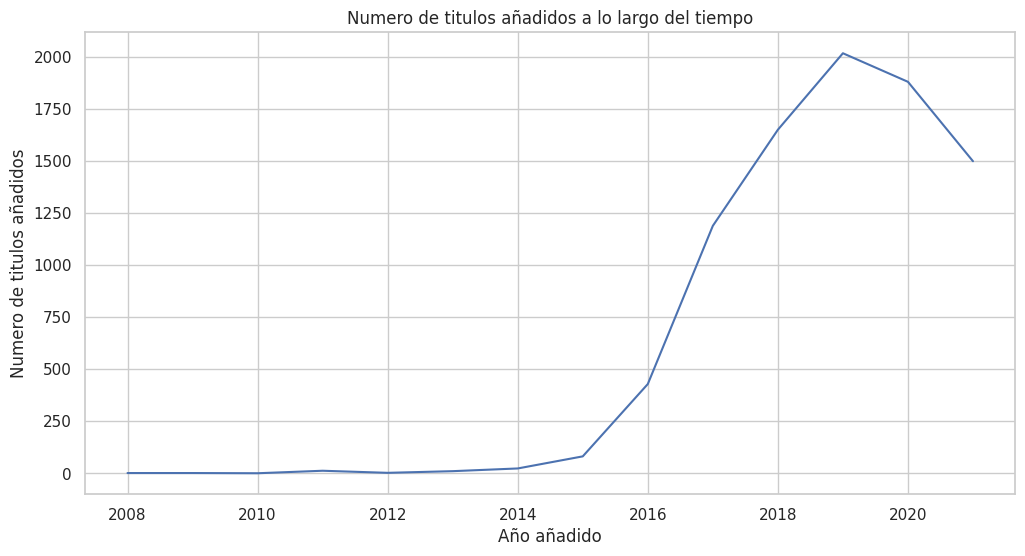

In [111]:
#4
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df_plots = df.groupby('year_added').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plots, x='year_added', y='count')
plt.xlabel('Año añadido')
plt.ylabel('Numero de titulos añadidos')
plt.title('Numero de titulos añadidos a lo largo del tiempo')
plt.show()

El año en que más crecio el catalogo due en 2019, esto debido a la aparición de nuevas plataformas que le hacen competencia permitiendo diferenciarse de ellas


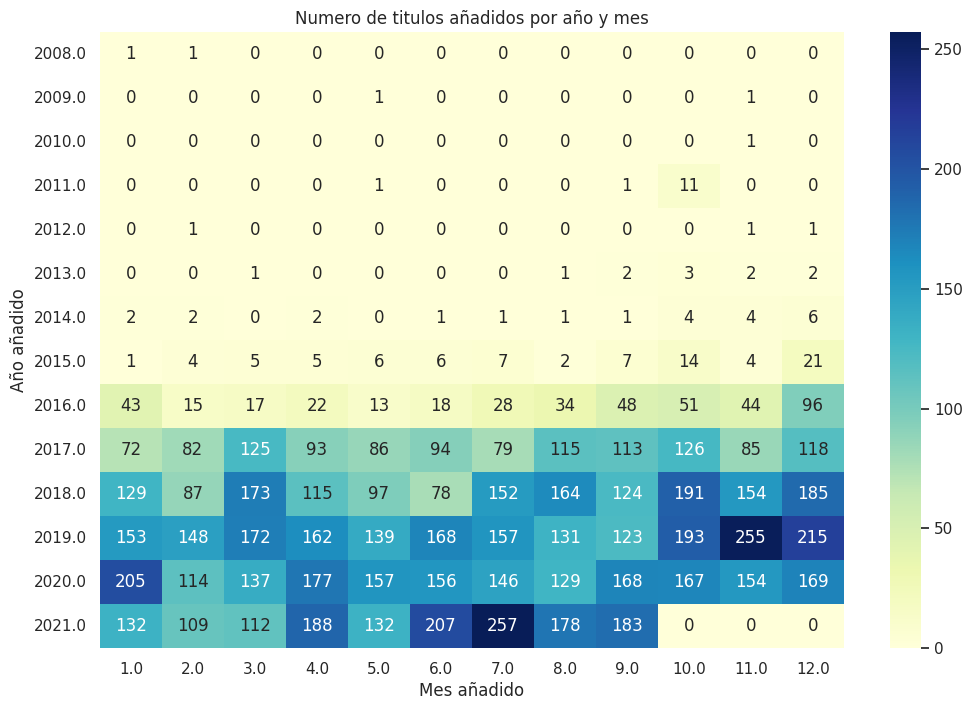

In [112]:
#5

heatmap_data = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt='d', annot=True)
plt.xlabel('Mes añadido')
plt.ylabel('Año añadido')
plt.title('Numero de titulos añadidos por año y mes')
plt.show()

Se puede apreciar que los meses con más estrenos son Julio, Octubre y DIciembre hace pensar que faltan datos de estos ultimos meses, pero coinciden con temporadas de vacaciones asi utilizan una estrategia de lanzamiento para que sea visto por el mayor numero de personas posible

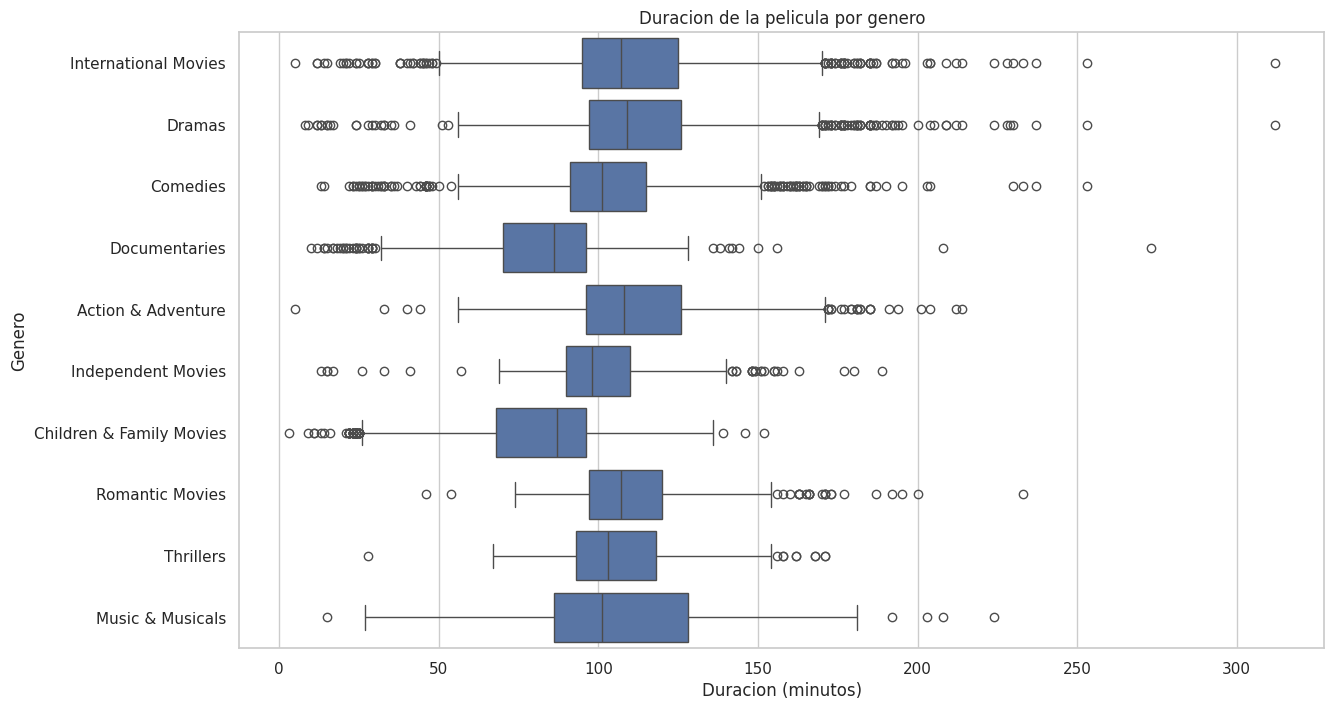

In [113]:
#6
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)

movies_df['listed_in'] = movies_df['listed_in'].str.split(', ')
movies_genres = movies_df.explode('listed_in').reset_index(drop=True)

plt.figure(figsize=(14, 8))
sns.boxplot(data=movies_genres, x='duration_minutes', y='listed_in', order=movies_genres['listed_in'].value_counts().index[:10])
plt.xlabel('Duracion (minutos)')
plt.ylabel('Genero')
plt.title('Duracion de la pelicula por genero')
plt.show()

Los generos que suelen durar más son los dramas, acción y aventura, peliculas romanticas y peliculas internacionales, hay algunos generos que muestran altas variabilidades como la musica y musicales o peliculas internacionales las cuales pueden ser por las diferencias culturales o distintos enfoques, mientras que las comedias o documentales muestran baja variabilidad por lo cual son mas consistentes y predecibles.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



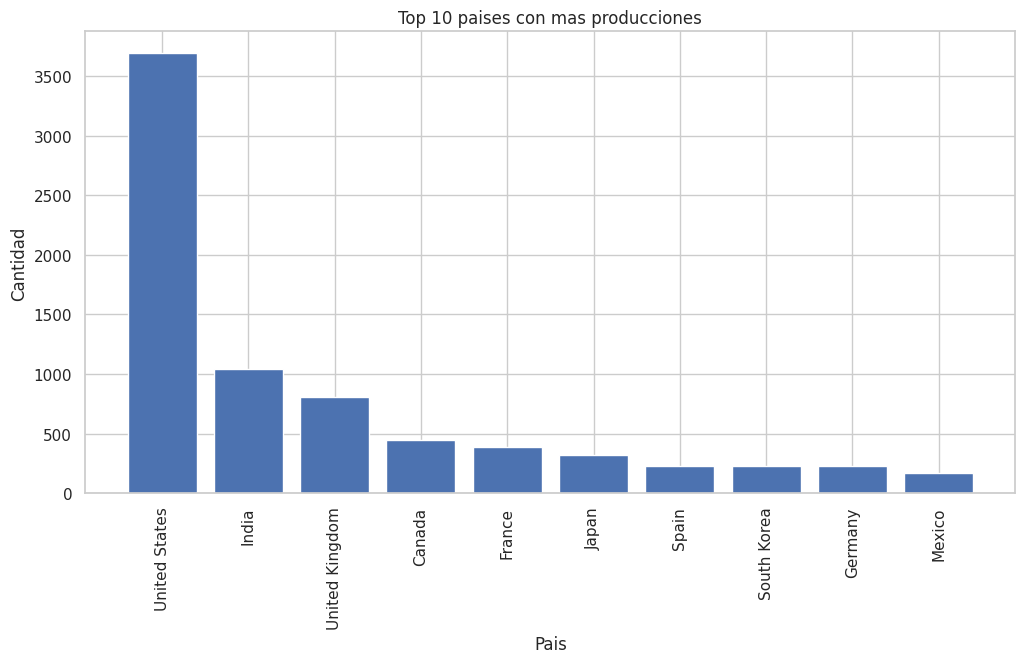

In [114]:
#7
country_counts = df['country'].str.split(', ').explode().value_counts()
top_10_countries = country_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Pais')
plt.ylabel('Cantidad')
plt.title('Top 10 paises con mas producciones')
plt.xticks(rotation=90)
plt.show()

El pais que más domina es Estados Unidos, esto no es sorprendente ya que la mayor industria del cine se encuentra ubicada ahi, de igual manera en India


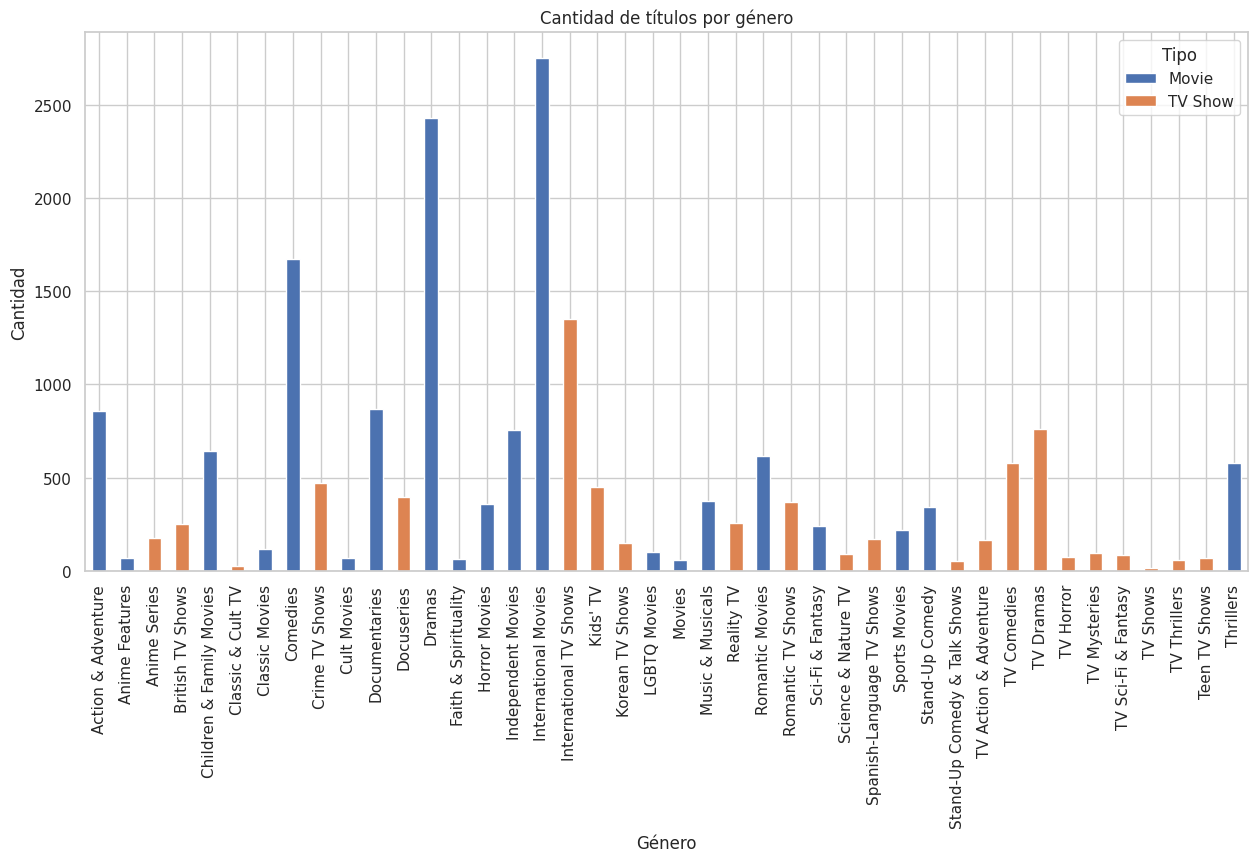

In [115]:
#8
df['listed_in'] = df['listed_in'].str.split(', ')

genres_df = df.explode('listed_in')
genres_counts = genres_df.groupby(['listed_in', 'type']).size().unstack(fill_value=0)
genres_counts = genres_counts.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
genres_counts.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de títulos por género')
plt.legend(title='Tipo')
plt.xticks(rotation=90)
plt.show()

Hay algunos que se ventran mucho mas en la industria de las series como el anime, reality y otros en peliculas como accion y aventura o comedias

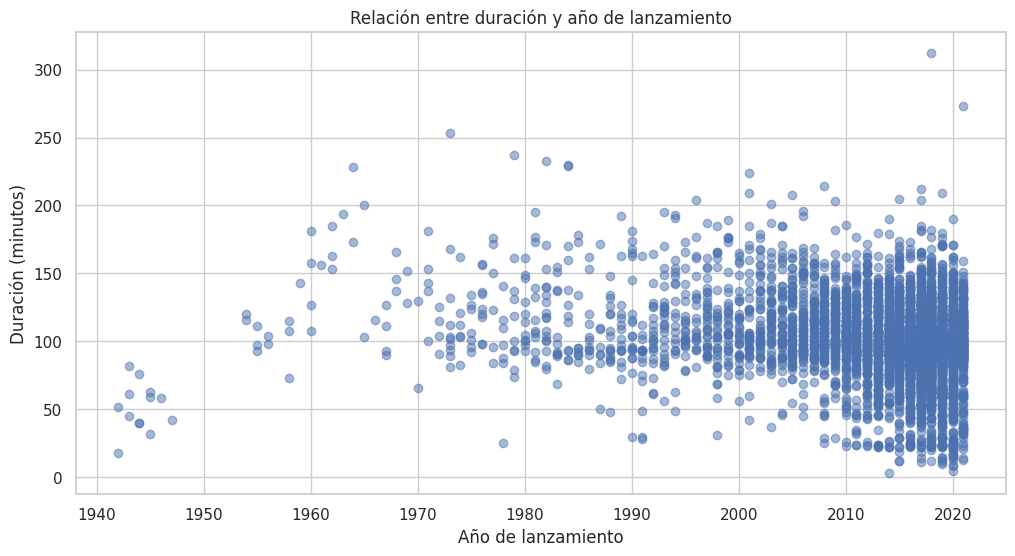

In [116]:
#9
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)
movies_df['release_year'] = movies_df['release_year'].astype(int)

plt.figure(figsize=(12, 6))
plt.scatter(movies_df['release_year'], movies_df['duration_minutes'], alpha=0.5)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración (minutos)')
plt.title('Relación entre duración y año de lanzamiento')
plt.show()


Se puede ver que a lo largo del tiempo las peliculas entre el 40 y 60 eran mas cortas en comparacion a las actuales ya que aunque existe dispersion se ve una tendencia entre 90 y 120 minutos

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

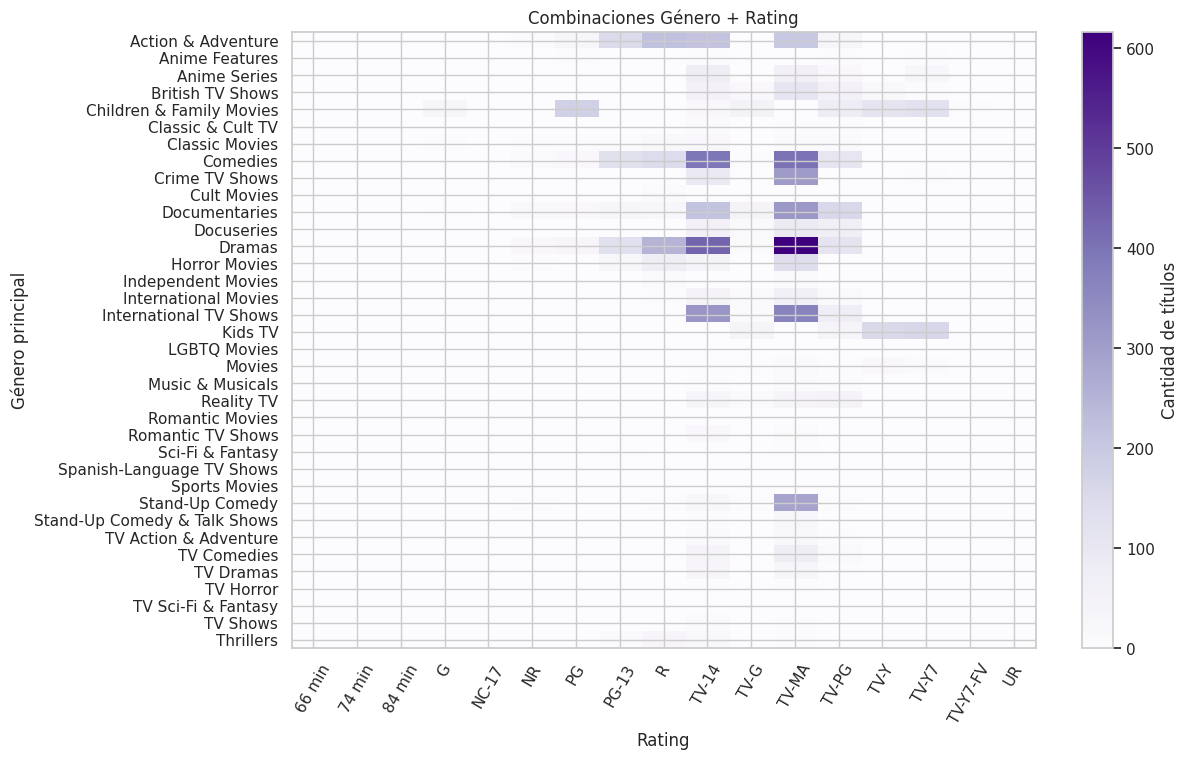

In [117]:
#Desafio Final

df_clean = df.dropna(subset=["rating"]).copy()
df_clean['first_genre'] = df_clean['listed_in'].apply(lambda x: str(x).split(',')[0].strip())
df_clean['first_genre'] = df_clean['first_genre'].str.replace(r"[\[\]\'\"]", "", regex=True)
genre_rating_counts = df_clean.groupby(['first_genre', 'rating']).size().unstack(fill_value=0)

data = genre_rating_counts.values
genres = genre_rating_counts.index
ratings = genre_rating_counts.columns

plt.figure(figsize=(12,8))
plt.imshow(data, cmap='Purples', aspect='auto')
plt.xticks(range(len(ratings)), ratings, rotation=60)
plt.yticks(range(len(genres)), genres)
plt.colorbar(label='Cantidad de títulos')
plt.xlabel('Rating')
plt.ylabel('Género principal')
plt.title('Combinaciones Género + Rating')
plt.show()


Podemos ver que para TV-MA hay una alta cantidad de dramas o tv de crimen o peliculas de horror entre otros por lo que estas estan mas orientadas a adultos, mientras que family movies o kids tv son mas orientados a publico infantil o familiar